In [1]:
%%capture
!pip install kaggle

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from kaggle.api.kaggle_api_extended import KaggleApi
from shutil import copyfile
from zipfile import ZipFile
import seaborn as sns

## Download database
source: https://www.kaggle.com/ronitf/heart-disease-uci

In [3]:
%%capture
file_name = 'kaggle.json'
src = file_name
dst = os.path.join(os.path.expanduser("~"), '.kaggle', file_name)
copyfile(src, dst)
api = KaggleApi()
api.authenticate()

In [4]:
api.dataset_download_files('ronitf/heart-disease-uci')
zf = ZipFile('heart-disease-uci.zip')
zf.extractall() 
zf.close()

## Review data
### Attribute Information:

    target: heart disease (0 = no; 1 = yes)

    1. age:      age
    2. sex:      sex (0 = female; 1 = male)
    3. cp:       chest pain type:
                 -- 0 = typical angina
                 -- 1 = atypical angina
                 -- 2 = non-anginal pain 
                 -- 3 = asymptomatic
    4. trestbps: resting blood pressure
    5. chol:     serum cholestoral in mg/dl
    6. fbs:      fasting blood sugar > 120 mg/dl (0 = false; 1 = true)
    7. restecg:  resting electrocardiographic results:
                 -- 0 = normal
                 -- 1 = having ST-T wave abnormality
                 -- 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
    8. thalach:  maximum heart rate achieved
    9. exang:    exercise induced angina (0 = no; 1 = yes)
    10. oldpeak: ST depression induced by exercise relative to rest
    11. slope:   the slope of the peak exercise ST segment:
                 -- 0 = upsloping
                 -- 1 = flat
                 -- 2 = downsloping
    12. ca:      number of major vessels (0-3) colored by flourosopy
    13. thal:    3 = normal; 6 = fixed defect; 7 = reversable defect

In [5]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* 13 features and 1 target in 303 samples

In [6]:
df.shape

(303, 14)

* all numerical values (even though most of them are attributes - sex for instance is male/female)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Target attribute

* target: heart disease (0 = no, 1 = yes)
* **~54.5%** have heart disease, **~45.5%** don't

In [8]:
df.target.unique()

array([1, 0])

In [9]:
df.target.value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

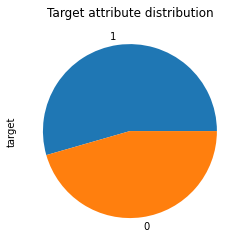

In [10]:
df.target.value_counts().plot(kind='pie', title='Target attribute distribution');

### Non-numerical attributes

* sex (0 = female; 1 = male)
* **~68%** male, **~32%** female

In [11]:
df.sex.unique()

array([1, 0])

In [12]:
df.sex.value_counts(normalize = True)

1    0.683168
0    0.316832
Name: sex, dtype: float64

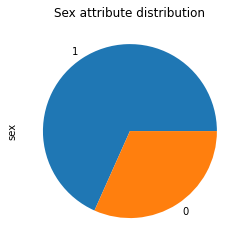

In [13]:
df.sex.value_counts().plot(kind='pie', title='Sex attribute distribution');

* chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic)
* **~47%** typical angina, **~29%** non-anginal pain, **16.5%** atypical angina, **7.5%** asymptomatic

In [14]:
df.cp.unique()

array([3, 2, 1, 0])

In [15]:
df.cp.value_counts(normalize = True)

0    0.471947
2    0.287129
1    0.165017
3    0.075908
Name: cp, dtype: float64

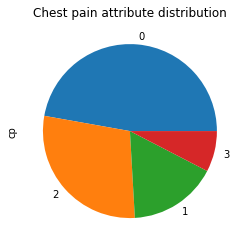

In [16]:
df.cp.value_counts().plot(kind='pie', title='Chest pain attribute distribution');

* fasting blood sugar > 120 mg/dl (0 = false; 1 = true)
* **~85%** low fbs, **~15%** high fbs

In [17]:
df.fbs.unique()

array([1, 0])

In [18]:
df.fbs.value_counts(normalize = True)

0    0.851485
1    0.148515
Name: fbs, dtype: float64

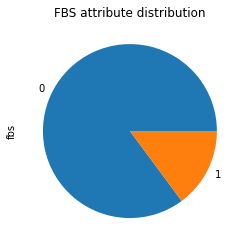

In [19]:
df.fbs.value_counts().plot(kind='pie', title='FBS attribute distribution');

* resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* **~50%** ST-T wave abnormality, **~48.5%** normal, **~1.3%** showing probable or definite left ventricular hypertrophy by Estes' criteria

In [20]:
df.restecg.unique()

array([0, 1, 2])

In [21]:
df.restecg.value_counts(normalize = True)

1    0.501650
0    0.485149
2    0.013201
Name: restecg, dtype: float64

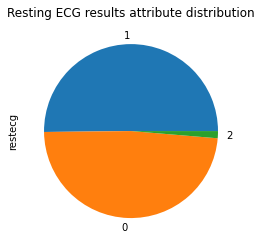

In [22]:
df.restecg.value_counts().plot(kind='pie', title='Resting ECG results attribute distribution');

* exercise induced angina (0 = no; 1 = yes)
* **~67%** with no exercise induced angina, **~33%** with exercise induced angina

In [23]:
df.exang.unique()

array([0, 1])

In [24]:
df.exang.value_counts(normalize = True)

0    0.673267
1    0.326733
Name: exang, dtype: float64

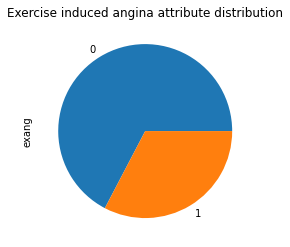

In [25]:
df.exang.value_counts().plot(kind='pie', title='Exercise induced angina attribute distribution');

* the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)
* **~47%** of the peak exercise ST segments were downslops, **~46%** of the peak exercise ST segments were flat and **~7%** of the peak exercise ST segments were upslopes

In [26]:
df.slope.unique()

array([0, 2, 1])

In [27]:
df.slope.value_counts(normalize = True)

2    0.468647
1    0.462046
0    0.069307
Name: slope, dtype: float64

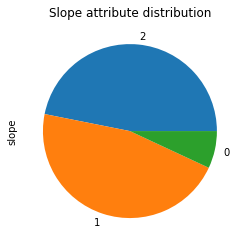

In [28]:
df.slope.value_counts().plot(kind='pie', title='Slope attribute distribution');

* number of major vessels colored by flourosopy (0 = 0 vessels; 1 = 1 vessel; 2 = 2 vessels; 3 = 3 vessels; 4 = ???)
* **~58%, ~21%, ~12.5% ~6.6%, ~1.6%** for 0, 1, 2, 3, 4 vessels correspondingly

In [34]:
df.ca.unique() # doesn't comply to dataset description

array([0, 2, 1, 3, 4])

In [35]:
df.ca.value_counts(normalize = True)

0    0.577558
1    0.214521
2    0.125413
3    0.066007
4    0.016502
Name: ca, dtype: float64

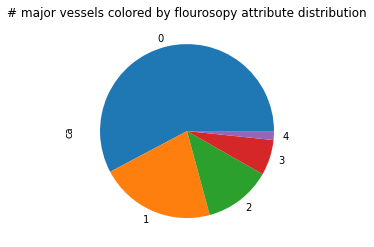

In [36]:
df.ca.value_counts().plot(kind='pie', title='# major vessels colored by flourosopy attribute distribution');

In [29]:
df.thal.unique()  # doesn't comply to dataset description

array([1, 2, 3, 0])

* some important stats on numerical attributes

### Numerical attributes

In [37]:
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[cols].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [38]:
cols.append('target')
df[cols].corr()

,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


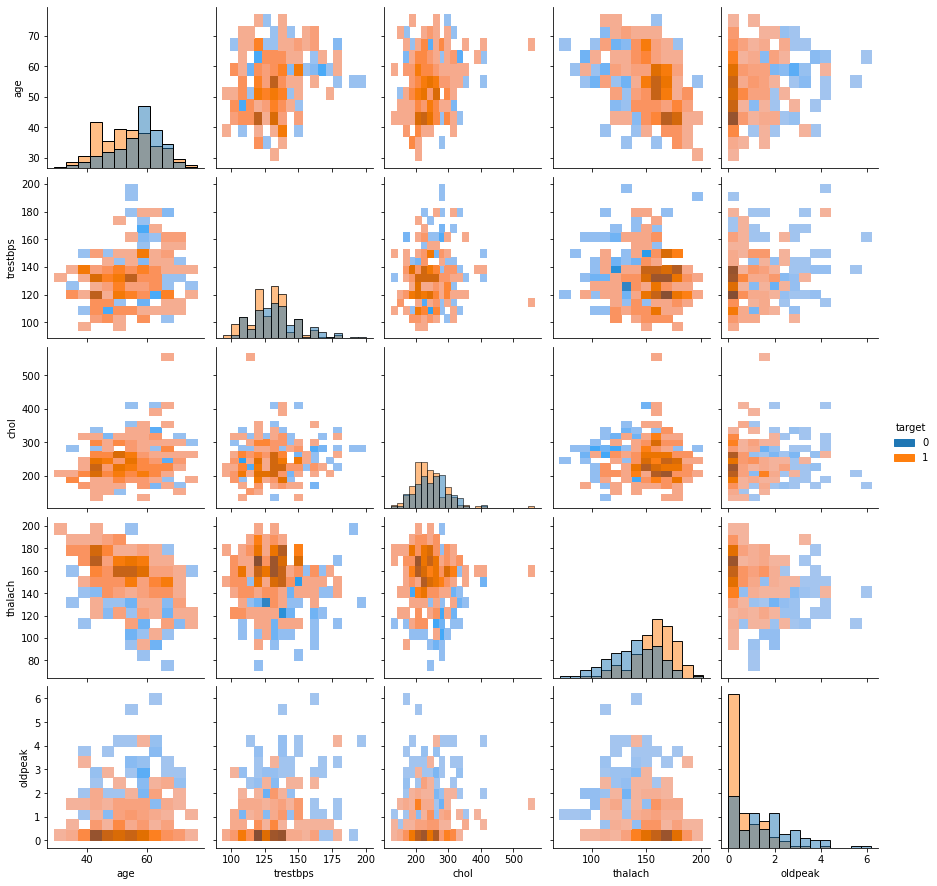

In [46]:
sns.pairplot(df[cols], hue='target', kind='hist');